In [16]:
#06 Saurabh Pande


# Data Visualization III
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a boxplot for each feature in the dataset.
4. Compare distributions and identify outliers.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('iris.csv')

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [21]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

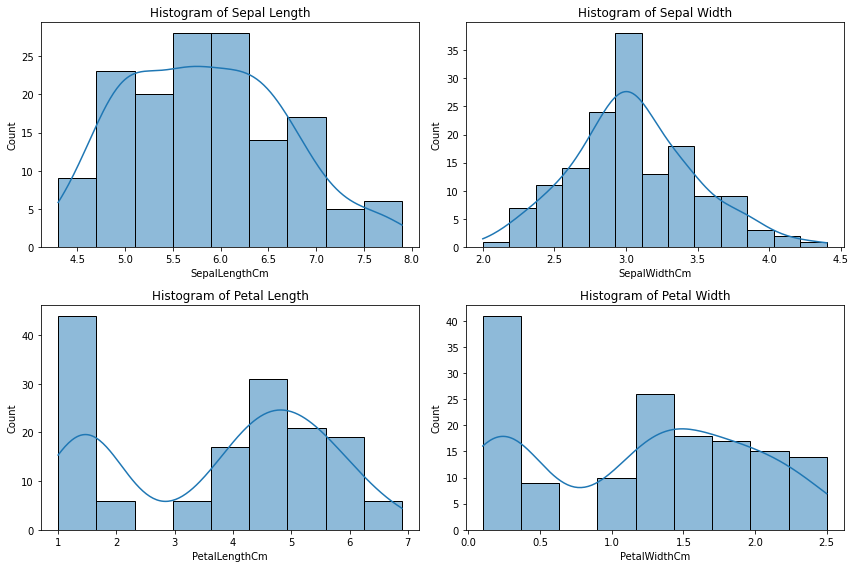

In [24]:
#histogram for each feature

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for each feature
sns.histplot(df['SepalLengthCm'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Histogram of Sepal Length')

sns.histplot(df['SepalWidthCm'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Histogram of Sepal Width')

sns.histplot(df['PetalLengthCm'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Histogram of Petal Length')

sns.histplot(df['PetalWidthCm'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Histogram of Petal Width')

plt.tight_layout()
plt.show()

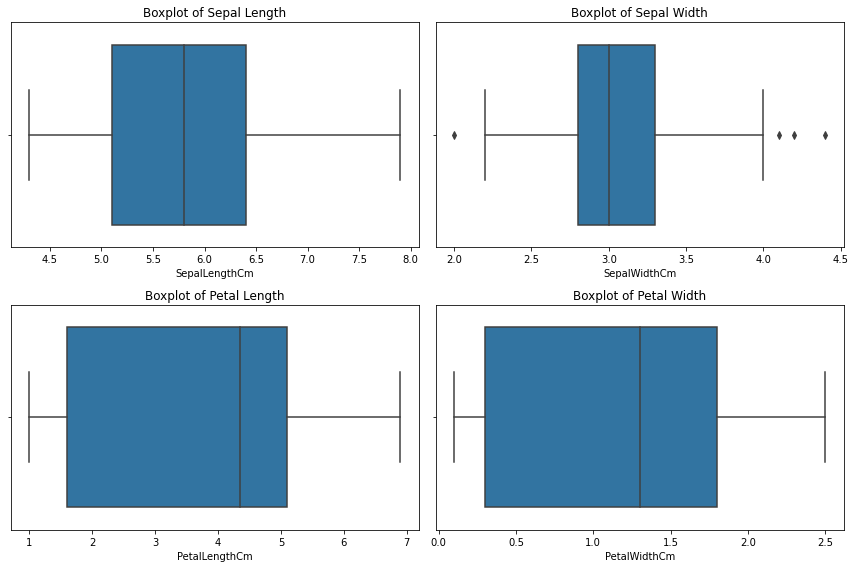

In [26]:
# Plot boxplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x=df['SepalLengthCm'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Sepal Length')

sns.boxplot(x=df['SepalWidthCm'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Sepal Width')

sns.boxplot(x=df['PetalLengthCm'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Petal Length')

sns.boxplot(x=df['PetalWidthCm'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Petal Width')

plt.tight_layout()
plt.show()

Shape before removing outliers: (150, 6)
Shape after removing outliers: (146, 6)


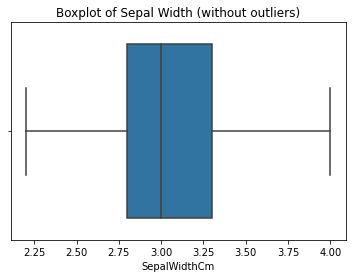

In [8]:
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['SepalWidthCm'] < lower_bound) | (df['SepalWidthCm'] > upper_bound)]


iris_cleaned = df[(df['SepalWidthCm'] >= lower_bound) & (df['SepalWidthCm'] <= upper_bound)]


print("Shape before removing outliers:",df.shape)
print("Shape after removing outliers:", iris_cleaned.shape)


sns.boxplot(x='SepalWidthCm', data=iris_cleaned)
plt.title('Boxplot of Sepal Width (without outliers)')
plt.show()

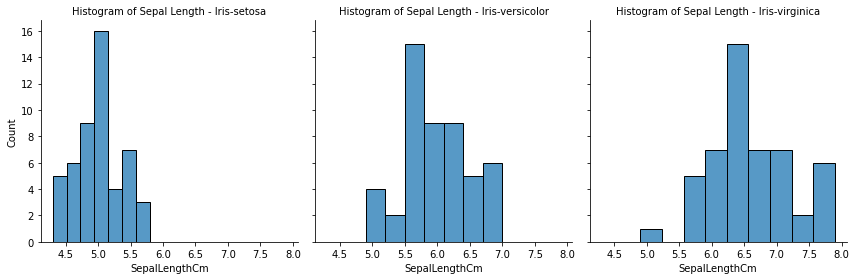

In [8]:
#facet grid 

g=sns.FacetGrid(df,col='Species',height=4)
g.map(sns.histplot,"SepalLengthCm")

g.set_titles("Histogram of Sepal Length - {col_name}")

plt.show()

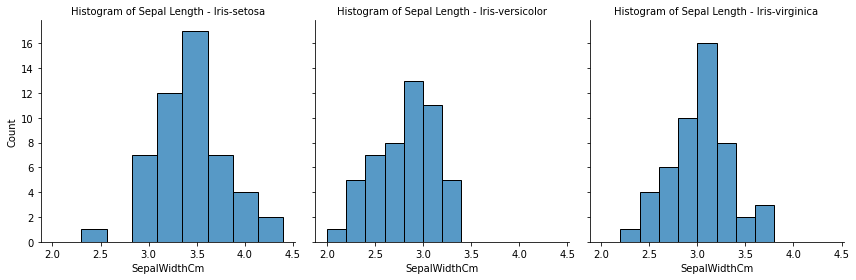

In [9]:
# facet grid for sepal width 

g=sns.FacetGrid(df,col='Species',height=4)
g.map(sns.histplot,"SepalWidthCm")

g.set_titles("Histogram of Sepal Length - {col_name}")

plt.show()

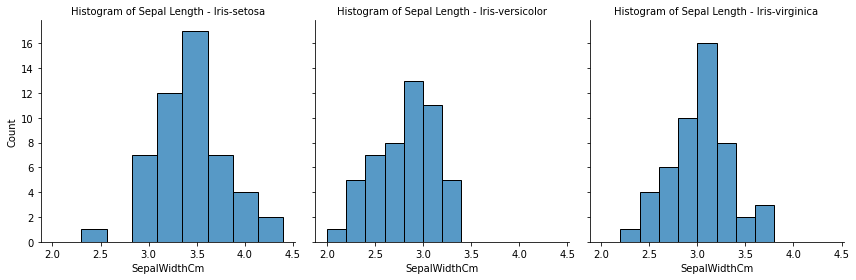

In [11]:
#FacetGrid of Petallength

g=sns.FacetGrid(df,col='Species',height=4)
g.map(sns.histplot,"SepalWidthCm")

g.set_titles("Histogram of Sepal Length - {col_name}")

plt.show()

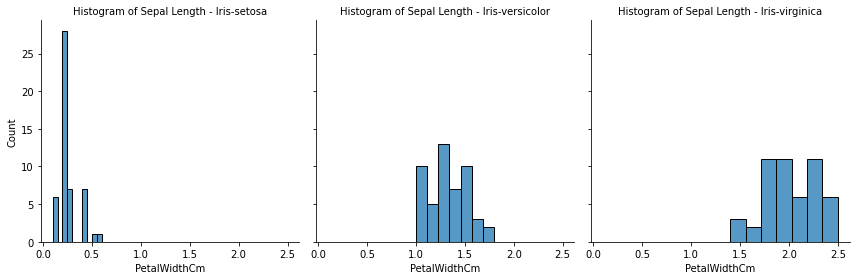

In [12]:
#FacetGrid for petalWidth

g=sns.FacetGrid(df,col='Species',height=4)
g.map(sns.histplot,"PetalWidthCm")

g.set_titles("Histogram of Sepal Length - {col_name}")

plt.show()